In [4]:
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from pathlib import Path

In [21]:
# Import the data
salaries = pd.read_csv("../Outputs/Full_Salary_Data.csv")
salaries.head()

,Experience_Years,Job_Position,Salary,Company_Size,Year
0,15,Data Analyst,130000.0,1000,2022
1,22,Data Analyst,450000.0,1000,2022
2,5,Data Analyst,78084.0,100000,2022
3,12,Data Analyst,15480.0,100000,2022
4,11,Data Analyst,200000.0,50000,2022


In [25]:
salaries['Job_Position'] = salaries['Job_Position'].replace(["Data Analyst"],[1])
salaries['Job_Position'] = salaries['Job_Position'].replace(["Data Scientist"],[2])
salaries['Job_Position'] = salaries['Job_Position'].replace(["Machine Learning Engineer"],[3])
# salaries['Job_Position'].value_counts()

In [26]:
salary_cluster = salaries.drop(columns='Salary')
# salary_cluster.head(10)

In [27]:
scaler = StandardScaler()
salary_scaled = scaler.fit_transform(salary_cluster)

## PCA

In [28]:
pca = PCA(n_components=0.90)
pca = pca.fit_transform(salary_scaled)
pca_df = pd.DataFrame(salary_scaled)
pca_df.head()

,0,1,2,3
0,0.858345,-1.262674,-0.639754,1.653685
1,1.780609,-1.262674,-0.639754,1.653685
2,-0.459176,-1.262674,1.901702,1.653685
3,0.463089,-1.262674,1.901702,1.653685
4,0.331337,-1.262674,0.618139,1.653685


## TSNE

In [29]:
tsne = TSNE(learning_rate=100)
tsne = tsne.fit_transform(pca_df)

C:\Users\Kaiza\anaconda3\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(


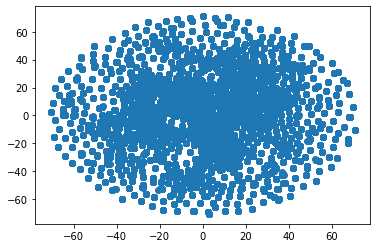

In [30]:
plt.scatter(tsne[:,0],tsne[:,1])

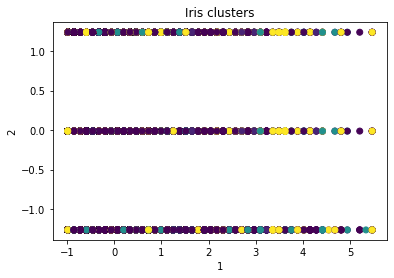

In [41]:
plt.scatter(x=pca_df[0], y=pca_df[1], 
            c=pca_df[2])
plt.xlabel('1')
plt.ylabel('2')
plt.title('Iris clusters')
plt.show()

## K-Means

In [42]:
salary = []

for k in range(1,50):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(pca_df)
    salary.append(kmeans.inertia_)

KeyboardInterrupt: 

In [ ]:
elbow = pd.DataFrame({"k": range(1,250), "salary": salary})

In [ ]:
plt.plot(elbow["k"], elbow["salary"])
plt.xticks(range(1,11))
plt.xlabel("Clusters")
plt.ylabel("Salary")
plt.title("K-Means Clusters")
plt.show()